## 课堂练习

### 爬楼梯

>自上而下的解法，f（n） = f（n-1） + f(n-2)，使用动态规划对其优化

>自下而上的解法，从1,2,3,4逐个算起，直到算到n

In [ ]:
#自下而上
class Solution:
    def climbStairs(self, n: int) -> int:
        if n == 1:
            return 1
        res = [0 for i in range(n)]
        res[0],res[1] = 1,2
        for i in range(2,n):
            res[i] = res[i-1] + res[i-2]
        return res[-1]
    
#引入临时变量，对空间复杂度进行优化
class Solution:
    def climbStairs(self, n: int) -> int:
        if n == 1:
            return 1
        a = 1
        b = 2
        for i in range(2,n):
            temp = b
            b = a + b
            a = temp
        return b

#自上而下,使用列表存储
class Solution:
    def climbStairs(self, n: int) -> int:
        if n == 1:
            return 1
        dic = [-1 for i in range(n)]
        dic[0],dic[1] = 1,2
        return self.helper(n-1,dic)
    def helper(self,n,dic):
        if dic[n] < 0:
            dic[n] = self.helper(n-1,dic) + self.helper(n-2,dic)
        return dic[n]
    
#自上而下,使用字典存储
class Solution:
    def climbStairs(self, n: int) -> int:
        if n == 1:
            return 1
        dic = {1:1,2:2}
        return self.helper(n,dic)
    def helper(self,n,dic):
        if n not in dic:
            dic[n] = self.helper(n-1,dic) + self.helper(n-2,dic)
        return dic[n]

In [ ]:
 Python topics at Stackoverflow

### 去括号

>生成所有可能，再排除无效，在此基础上进行优化，生成时即判断是否有效

>

In [15]:
##深度优先，转自https://leetcode.com/problems/generate-parentheses/discuss/10096/4-7-lines-Python

def generateParenthesis(self, n):
    def generate(p, left, right, parens=[]):
        if left:         generate(p + '(', left-1, right)
        # 是p+"("而不是'('+p
        if right > left: generate(p + ')', left, right-1)
        if not right:    parens += p,
        #是p，
        return parens
    return generate('', n, n)

a = []
a += 'hhel',
a += 'hhel'
a #后面多一个逗号的区别

['hhel', 'h', 'h', 'e', 'l']

In [25]:
##动态规划，转自https://leetcode.com/problems/generate-parentheses/discuss/10369/Clean-Python-DP-Solution

class Solution(object):
    def generateParenthesis(self, n):
        """
        :type n: int
        :rtype: List[str]
        """
        dp = [[] for i in range(n + 1)]
        dp[0].append('')
        for i in range(n + 1):
            for j in range(i):
                #状态转移方程
                dp[i] += ['(' + x + ')' + y for x in dp[j] for y in dp[i - j - 1]]
        return dp[n]

for i in range(3):
    print(i)
    for j in range(i):
        print(i,j)
#如果是range（0）就没运行

0
1
1 0
2
2 0
2 1


## 子集

老师的建议模板
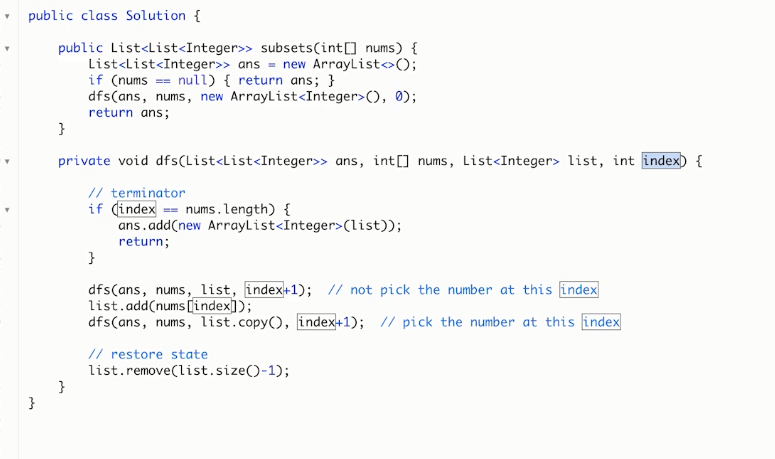

### mypow(x,n) 

采用二分

In [ ]:
##转自leetcode题解https://leetcode.com/problems/powx-n/discuss/19560/Shortest-Python-Guaranteed
class Solution:
    def myPow(self, x: float, n: int) -> float:
        if not n:
            return 1 
        if n < 0:
            return self.myPow(x,-n)
        if n % 2:
            return x*self.myPow(x,n-1)
        return self.myPow(x*x,n/2)

## 作业

### 二叉树的最近公共祖先

最近公共祖先的定义： 设节点 rootroot 为节点 p, qp,q 的某公共祖先，若其左子节点 root.leftroot.left 和右子节点 root.rightroot.right 都不是 p,qp,q 的公共祖先，则称 rootroot 是 “最近的公共祖先” 。

In [ ]:
#题解转自https://leetcode.com/problems/lowest-common-ancestor-of-a-binary-tree/discuss/65225/4-lines-C%2B%2BJavaPythonRuby
#解题思路参考https://leetcode-cn.com/problems/lowest-common-ancestor-of-a-binary-tree/solution/236-er-cha-shu-de-zui-jin-gong-gong-zu-xian-hou-xu/

class Solution:
    def lowestCommonAncestor(self, root: 'TreeNode', p: 'TreeNode', q: 'TreeNode') -> 'TreeNode':
        #递归出口
        if root in [None,p,q]:return root
        #递归公式
        left,right = [self.lowestCommonAncestor(kid,p,q) for kid in [root.left,root.right]]
        #返回值
        return root if left and right else left or right
    
#怎么在这个递归中使用到哈希表呢

In [ ]:
#借助哈希表存储每个节点的父节点
dic = {}
class Solution:
    def lowestCommonAncestor(self, root: 'TreeNode', p: 'TreeNode', q: 'TreeNode',LCA = []) -> 'TreeNode':
        self.dfs(root)
        dic[root.val] = None
        visited = []
        while(p!=None):
            visited.append(p.val)
            p = dic[p.val]
        while(q!=None):
            if q.val in visited:
                return q
            q = dic[q.val]

    def dfs(self,root):
        if root.left:
            dic[root.left.val] = root
            self.dfs(root.left)
        if root.right:
            dic[root.right.val] = root
            self.dfs(root.right)

## 组合

最小重复子问题：假如最后一个数即第k个数是第i个位置，那么剩下k-1个数，要在前i-1个数里找

In [ ]:
##转自https://leetcode.com/problems/combinations/discuss/27024/1-liner-3-liner-4-liner
#能避免重复子问题
class Solution:
    def combine(self, n: int, k: int) -> List[List[int]]:
        #递归出口
        if k == 0:
            return [[]]
        #最小子问题,假如最后一个数即第k个数是第i个位置
        #那么剩下k-1个数，要在前i-1个数里找
        return [pre + [i] for i in range(k,n+1) for pre in self.combine(i-1,k-1)]
    
#未看的两种解法
class Solution:
    def combine(self, n, k):
        combs = [[]]
        for _ in range(k):
            combs = [[i] + c for c in combs for i in range(1, c[0] if c else n+1)]
        return combs
    
class Solution:
    def combine(self, n, k):
        return reduce(lambda C, _: [[i]+c for c in C for i in range(1, c[0] if c else n+1)],
                  range(k), [[]])

## 全排列

方法一、一个数组长度为length，对于n<=length,只要前n个数字顺序不同，那么这个数组顺序也不同。那么最小子问题可以转换为，对于某一个数组，一个新数字有多个可插入位子，不同位子就产生不同排列顺序。

方法二、用深度递归，最小子问题可以转换为每次从未取过的数中取一个数

In [ ]:
#转自https://leetcode.com/problems/permutations/discuss/18237/My-AC-simple-iterative-javapython-solution
class Solution:
    def permute(self, nums: List[int]) -> List[List[int]]:
        res = [[]]
        for number in nums:
            #每对一个数进行排序都要对结果进行更新
            #new_res暂存更新的结果
            new_res = []
            #将number加入当前所有的子结果
            for sub_res in res:
                #加入长度为n，则新的数字可取的位置有n+1个
                for i in range(len(sub_res)+1):
                    new_res.append(sub_res[:i] + [n] + sub_res[i:])
            #对res进行更新
            res = new_res
        return res

In [ ]:
#转自https://leetcode.com/problems/permutations/discuss/18296/Simple-Python-solution-(DFS).
class Solution:
    def permute(self, nums: List[int]) -> List[List[int]]:
        res = []
        self.dfs(nums,[],res)
        return res

    def dfs(self,nums,path,res):
        #path记录遍历的结果
        #递归终止条件
        if not nums:
            res.append(path)
        for i in range(len(nums)):
            #有n个数字，树会产生n个分支
            #对于每个分支进行深度遍历，在数组中取一个数形成节点
            #下一个节点在剩下的数字里找
            self.dfs(nums[:i]+nums[i+1:],path+[nums[i]],res)